# Project - Call to Action
## By Vinda Shinde

## Objective
To read the json file shared by the government on Public Computer Resource Center. The data in the file shows mostly shows the information for address, transportation ways to rech the center, contact information etc.
Post reading the json file I will try to get the tags and the information shared in it and find the insights. 

From the findings I can make the recommondation for the Computer Resource Center's rechability.


In [94]:
import json
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

inFile = open("DPR_PublicComputerResourceCenter_001.json",'r')
recreation_data = json.load(inFile)
#recreation_data
#inFile.close()

str(type(recreation_data))

print(recreation_data)

[{'Prop_ID': 'M194', 'name': 'Alfred E. Smith Recreation Center', 'address': '80 Catherine Street', 'cross_streets': 'at Cherry Street', 'description': 'Named for the first Irish Catholic to be nominated for President, the Alfred E. Smith Recreation Center was built in the 1950s to provide the overpopulated Lower East Side with access to open spaces and athletic facilities. The Center houses many athletic and educational programs for children and adults throughout the day. Its large gymnasium hosts many community events.', 'by_car': None, 'by_subway': "From the 4, 5, 6, J, M, Z: Go to the Brooklyn Bridge/City Hall stop. Exit the station at the Municipal Building. Walk North on Centre Street. Right on Worth Street. Walk East on Worth to the Bowery. At this intersection go straight, to Oliver Street. Walk down Oliver Street and take a Left on Madison Street. Walk to the next corner. Turn right on Catherine Street. The address of the center is 80 Catherine Street. It's located behind the 

In [125]:
phones = []
names = []

for i in range(len(recreation_data)):
    names.append(recreation_data[i]['name'])
    phones.append(recreation_data[i]['phone'])
    
    if phones[i] == None:
        print('The phone number is missing for center:'+ names[i])
    if address[i] == None:
        print('The address is not available for center:'+ names[i])

print('No address is missing for any center')
   

The phone number is missing for center:Gertrude Ederle Recreation Center
No address is missing for any center


### Transportation information for the centers
To find if the all the centers have the proper reachability by Bus, Car or Subway is available in the JSON file. To find the details I am storing the tags information in seperate lists. In this every list I am trying to find if the data is available if its not then its missing.

For this I am creating by_bus, by_car and by_subway lists and getting the lenght of list for which this information is missing. This data will help get identify either non updated or not available transportation centers.

In [65]:
# list for the tags

by_car = []
not_by_car = []
by_bus = []
not_by_bus =[]
by_subway = []
not_by_subway = []

# Iterate the json file object and add the relevant information in lists
for i in range(len(recreation_data)):
    by_car.append(recreation_data[i]['by_car'])
    by_bus.append(recreation_data[i]['by_bus'])
    by_subway.append(recreation_data[i]['by_subway'])

#Check condition for availibility
    if by_bus[i] == None:
        not_by_bus.append(recreation_data[i]['by_bus'])
    if by_car[i] == None:
        not_by_car.append(recreation_data[i]['by_car'])
    if by_subway[i] == None:
        not_by_subway.append(recreation_data[i]['by_subway'])
        
print('Number of centers with missing information for BUS:',len(not_by_bus))
print('Number of centers with missing information by CAR:',len(not_by_car))
print('Number of centers with missing information by SUBWAY:',len(not_by_subway))


Number of centers with missing information for BUS: 26
Number of centers with missing information by CAR: 17
Number of centers with missing information by SUBWAY: 7


To find if there are any centers without any transportation information? I am running the check on all mean of transportation like below. This will help get the centers for which the correct transportation to be updated in records.

In [126]:
missing_transportation =[]
for i in range(len(recreation_data)):
     if by_bus[i] == None and by_subway[i] == None and by_car[i] == None:
        missing_transportation.append(recreation_data[i]['name'])
        
print ('The transportaion information totally missing and needs to be updates for centers are:\n' ,missing_transportation)
    

The transportaion information totally missing and needs to be updates for centers are:
 ['McCarren Play Center', 'West Bronx Recreation Center', 'Faber Park Field House', 'Gertrude Ederle Recreation Center', 'Detective Keith L. Williams Field House', 'Vic Hanson Field House']


As listed in above print statement the Computer centers for which the additional information to reach center is completely missing and these centeres, records needs to be updated.

In a plot below I want to show the count of computer centers for which the transportation information is missing with the all available transportation options.

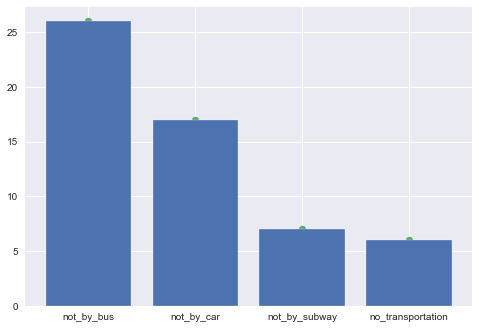

In [127]:
# Plot the missing transportation means
mix_list = [len(not_by_bus), len(not_by_car), len(not_by_subway),len(missing_transportation)]
count_list = ['not_by_bus','not_by_car','not_by_subway','no_transportation']  

plt.bar(count_list,mix_list)
plt.scatter(count_list,mix_list)

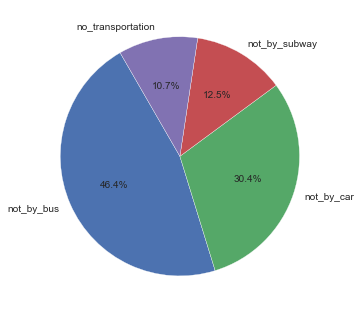

In [128]:
plt.pie(mix_list, labels = count_list, startangle = 120, autopct ='%1.1f%%')
plt.show()

As we can see the 10.7% of the available centeres do not have any transportation information listed. Its a big number to be acted on fast.

### Public Computer Resource centere administrations information

In [80]:
address = []
fax = []
missing_fax = []
manager = []
no_manager = []
coordinator = []
no_coordinator = []

for i in range(len(recreation_data)):
    
    address.append(recreation_data[i]['address'])
    fax.append(recreation_data[i]['fax'])
    manager.append(recreation_data[i]['manager'])
    coordinator.append(recreation_data[i]['coordinator'])
    
    
    if fax[i] == None:
        missing_fax.append(recreation_data[i]['fax'])
                           
    if manager[i] == None:
        no_manager.append(recreation_data[i]['manager'])
    if coordinator[i] == None:
        no_coordinator.append(recreation_data[i]['coordinator'])

print('Number of centers with no FAX numbers:',len(missing_fax))
print('Number of centers without any Managers:',len(no_manager))
print('Number of centers without any Coordinators:',len(no_coordinator))

Number of centers with no FAX numbers: 25
Number of centers without any Managers: 7
Number of centers without any Coordinators: 11


To find if there are any centers without basic administration management information? I am running the check on all the available basic information like below. This will help get the centers for which the basic administration information to be updated in records.

In [81]:
missing_admin_info =[]
for i in range(len(recreation_data)):
     if fax[i] == None and manager[i] == None and coordinator[i] == None:
        missing_admin_info.append(recreation_data[i]['name'])
        
print ('The Adminitsration team missing and needs to be updates for centers are:\n' ,missing_admin_info)
    

The Adminitsration team missing and needs to be updates for centers are:
 ['McCarren Play Center', 'West Bronx Recreation Center', 'Faber Park Field House', 'Gertrude Ederle Recreation Center']


As listed in above print statement the Computer centers for which the administration information is completely missing and these centeres, records needs to be updated.

In a plot below I want to show the count of computer centers for which the basic administration information is missing with the all basic services.

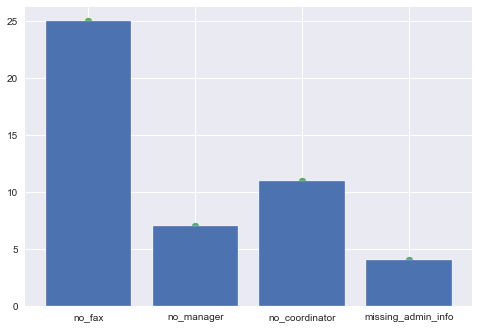

In [129]:
# Plot the missing transportation means
mix_list = [len(missing_fax), len(no_manager), len(no_coordinator),len(missing_admin_info)]
count_list = ['no_fax','no_manager','no_coordinator','missing_admin_info']  

plt.bar(count_list,mix_list)
plt.scatter(count_list,mix_list)

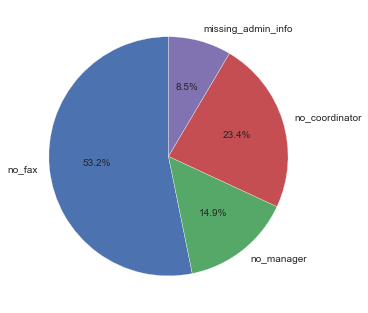

In [130]:
plt.pie(mix_list, labels = count_list, startangle = 90, autopct ='%1.1f%%')
plt.show()

As we can see the 8.5% of the available centeres do not have any administration information added, which is very critical information. Also 53.2% of the centers are without FAX machines, so if its not usable either needs to be removed totally.Total of 23.4% centersa are also running without any Coordinators and 14.9% are without Managers, these positions are one of the important roles and needs to be filled soon.

In [122]:
for i in range(len(missing_transportation)):
    if missing_transportation[i] == missing_admin_info[i]:
        print(missing_admin_info[i])

McCarren Play Center
West Bronx Recreation Center
Faber Park Field House
Gertrude Ederle Recreation Center


IndexError: list index out of range

The 4 Public Computer Resource Centers which needs immediate updation in records and/or attention of authorities are as above.

# Recommendations 

1) As we can see the 10.7% of the available centeres do not have any transportation information listed. Its a big number to be acted on fast.

2) As we can see the 8.5% of the available centeres do not have any administration information added, which is very critical information. Also 53.2% of the centers are without FAX machines, so if its not usable either needs to be removed totally.Total of 23.4% centersa are also running without any Coordinators and 14.9% are without Managers, these positions are one of the important roles and needs to be filled soon.

3) Also there these 4 centers "McCarren Play Center, West Bronx Recreation Center, Faber Park Field House, Gertrude Ederle Recreation Center" needs immediate attention of authorities for its smooth functioning.

4) The overall transportation information needs to be updated or the centers to be moved in a location where its easily available to the public. But the top most attention to be put on the Administration and its resources for these centers.